In [22]:
import numpy as np

In [23]:
import pandas as pd

In [24]:
from google.colab import files
uploaded = files.upload()


Saving spam_texts.csv to spam_texts (2).csv


In [57]:
#here we read the uploaded file using a specific encoding known as ISO-8859-1 (also known as latin1)
df = pd.read_csv('spam_texts.csv', encoding='ISO-8859-1')

In [58]:
df.sample(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4068,ham,Hope youåÕre not having too much fun without m...,NaN,NaN,NaN
3479,ham,What was she looking for?,NaN,NaN,NaN
2478,ham,Not yet. Just i'd like to keep in touch and it...,NaN,NaN,NaN
4511,ham,Now project pa. After that only i can come.,NaN,NaN,NaN
2850,ham,Are you going to wipro interview today?,NaN,NaN,NaN
2823,ham,No need to buy lunch for me.. I eat maggi mee..,NaN,NaN,NaN
5006,ham,Oh k. . I will come tomorrow,NaN,NaN,NaN
555,ham,O. Well uv causes mutations. Sunscreen is like...,NaN,NaN,NaN
927,ham,K:)i will give my kvb acc details:),NaN,NaN,NaN
2051,ham,Hey darlin.. i can pick u up at college if u t...,NaN,NaN,NaN


In [59]:
df.shape

(5572, 5)

In [60]:
# Drop unnecessary columns
df = df[['v1', 'v2']]

In [61]:
# Rename columns for clarity
df.columns = ['label', 'message']

**Data Cleaning and Processing**

In [62]:
df.info(), df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


(None,
 label
 ham     4825
 spam     747
 Name: count, dtype: int64)

In [63]:
df.sample(10)

,label,message
4176,ham,Ok lor then we go tog lor...
3203,ham,She's good. How are you. Where r u working now
5228,spam,PRIVATE! Your 2003 Account Statement for <fone...
4945,ham,I'm already back home so no probably not
2354,ham,R we going with the &lt;#&gt; bus?
5268,ham,\ER
4501,ham,Wot is u up 2 then bitch?
1254,ham,What your plan for pongal?
4607,ham,We live in the next &lt;#&gt; mins
3293,ham,Beautiful tomorrow never comes.. When it comes...


**Data Preprocessing**

In [64]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize # Changed 'word_tokeniz' to 'word_tokenize'

In [65]:
# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [67]:
# Convert labels to binary values: ham = 0, spam = 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [68]:
# Function to process text without using NLTK's word_tokenize
def process_text_manually(text):
    # Lowercase the text
    text = text.lower()

    # Tokenization: Split text into words (using split())
    tokens = text.split()

    # Remove punctuation and special characters, keep only alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]

    # Remove stopwords
    # Changed 'basic_stopwords' to 'stop_words'
    tokens = [word for word in tokens if word not in stop_words]

    # Apply stemming
    tokens = [stemmer.stem(word) for word in tokens]

    # Join the tokens back into a single string
    return ' '.join(tokens)

In [69]:
# Apply the new processing function to the 'message' column
df['cleaned_message'] = df['message'].apply(process_text_manually)

In [70]:
# Display cleaned messages and labels
df[['message', 'cleaned_message']].head()

,message,cleaned_message
0,"Go until jurong point, crazy.. Available only ...",go jurong avail bugi n great world la e cine g...
1,Ok lar... Joking wif u oni...,ok joke wif u
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt may ...
3,U dun say so early hor... U c already then say...,u dun say earli u c alreadi
4,"Nah I don't think he goes to usf, he lives aro...",nah think goe live around though


In [71]:
df.sample(20)

,label,message,cleaned_message
1547,0,Bishan lar nearer... No need buy so early cos ...,bishan lar need buy earli co buy gotta park
817,0,Also are you bringing galileo or dobby,also bring galileo dobbi
2654,0,Its sarcasm.. .nt scarcasim,scarcasim
4451,0,I've told you everything will stop. Just dont ...,told everyth dont let get
4938,0,Tomarrow i want to got to court. At &lt;DECIM...,tomarrow want got come bu stand
3002,0,I will see in half an hour,see half hour
3509,0,I just saw ron burgundy captaining a party boa...,saw ron burgundi captain parti boat yeah
650,0,Thats cool! Sometimes slow and gentle. Sonetim...,that sometim slow sonetim rough hard
3484,0,No:-)i got rumour that you going to buy apartm...,got rumour go buy apart
149,0,Sindu got job in birla soft ..,sindu got job birla soft


In [72]:
# missing values
df.isnull().sum()

,0
label,0
message,0
cleaned_message,0


In [73]:
# checking for duplicate values
df.duplicated().sum()

np.int64(403)

In [74]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [76]:
df.duplicated().sum()

np.int64(0)

In [77]:
df.shape

(5169, 3)

**Text Vectorization**

In [78]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_message'], df['label'], test_size=0.2, random_state=42)

# Show number of samples in each set
len(X_train), len(X_test)

(4135, 1034)

In [79]:
# Display first 3 samples from training and test sets

train_samples = pd.DataFrame({'message': X_train[:3].values, 'label': y_train[:3].values})
test_samples = pd.DataFrame({'message': X_test[:3].values, 'label': y_test[:3].values})

train_samples, test_samples


(               message  label
 0         exact intent      0
 1                  one      0
 2  lololo ok next time      0,
                                              message  label
 0                                   u download fring      0
 1  pass di ur contact n see wat u luv wid put smi...      0
 2                                                         0)

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform training data, transform test data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Show the shape of transformed data
X_train_vec.shape, X_test_vec.shape

((4135, 4376), (1034, 4376))

**Exploratory Data Analysis**

In [82]:
df.sample(10)

,label,message,cleaned_message
5474,0,Where's mummy's boy ? Is he being good or bad ...,boy good bad posit neg mummi made
3856,0,No! But we found a diff farm shop to buy some ...,found diff farm shop buy way back call
3609,0,"Call me. I m unable to cal. Lets meet bhaskar,...",call unabl let meet deep
1925,0,We don call like &lt;#&gt; times oh. No give...,call like time give us hypertens
366,1,"Update_Now - Xmas Offer! Latest Motorola, Sony...",xma latest sonyericsson nokia free doubl min t...
3516,0,So you think i should actually talk to him? No...,think actual talk call boss went place last ye...
2012,0,Beautiful Truth against Gravity.. Read careful...,beauti truth read heart feel light someon feel...
4048,0,Yeah that's the impression I got,yeah impress got
130,0,I'm home.,
1427,0,THING R GOOD THANX GOT EXAMS IN MARCH IVE DONE...,thing r good thanx got exam march ive done fra...


In [83]:
df['label'].value_counts()

,count
label,
0,4516
1,653


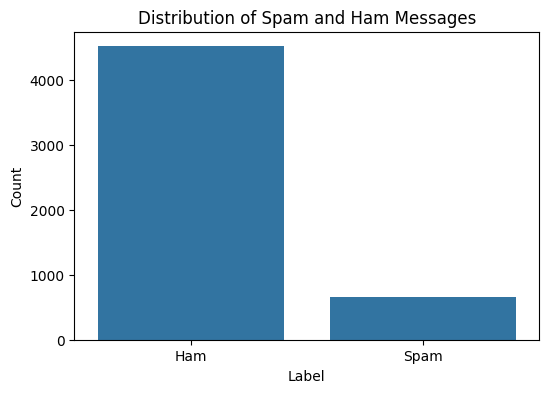

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of spam vs ham messages
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()


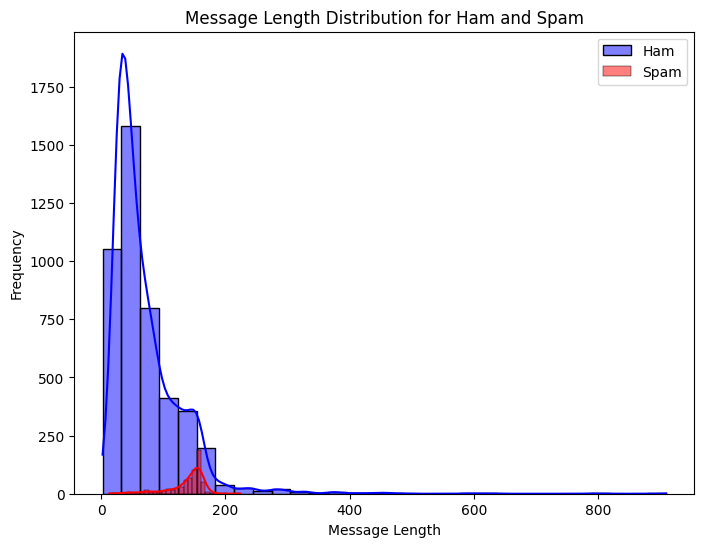

In [85]:
# Display the length of messages for spam vs ham
df['message_length'] = df['message'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(df[df['label'] == 0]['message_length'], color='blue', label='Ham', kde=True, bins=30)
sns.histplot(df[df['label'] == 1]['message_length'], color='red', label='Spam', kde=True, bins=30)
plt.title('Message Length Distribution for Ham and Spam')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [86]:
import nltk

In [410]:
!pip install nltk

In [87]:
df.head()


,label,message,cleaned_message,message_length
0,0,"Go until jurong point, crazy.. Available only ...",go jurong avail bugi n great world la e cine g...,111
1,0,Ok lar... Joking wif u oni...,ok joke wif u,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt may ...,155
3,0,U dun say so early hor... U c already then say...,u dun say earli u c alreadi,49
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe live around though,61


In [88]:
 # Add a new column for the number of words in each message
df['num_words'] = df['message'].apply(lambda x: len(x.split()))

In [89]:
# Display the first few rows with the new column
df[['message', 'num_words']].head()

,message,num_words
0,"Go until jurong point, crazy.. Available only ...",20
1,Ok lar... Joking wif u oni...,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,U dun say so early hor... U c already then say...,11
4,"Nah I don't think he goes to usf, he lives aro...",13


In [91]:
df.sample(12)

,label,message,cleaned_message,message_length,num_words
372,0,I'm going for bath will msg you next &lt;#&gt...,go bath msg next,54,10
4533,0,I have no money 4 steve mate! !,money steve,31,8
5278,1,URGENT! Your Mobile number has been awarded wi...,mobil number award prize call land claim valid,144,23
3177,0,K k :-):-) then watch some films.,k k watch,33,7
2497,0,Dai what this da.. Can i send my resume to thi...,dai send resum,51,12
1731,0,Lol. Well quality aint bad at all so i aint co...,well qualiti aint bad aint complain,55,11
3138,0,Is ur lecture over?,ur lectur,19,4
3105,0,I had been hoping i would not have to send you...,hope would send rent due dont enough reserv co...,297,64
5325,0,Gal n boy walking in d park. gal-can i hold ur...,gal n boy walk hold ur u think would run jst w...,160,33
2816,1,Gr8 Poly tones 4 ALL mobs direct 2u rply with ...,poli tone mob direct rpli poli titl eg poli ymca,160,25


In [92]:

df[['cleaned_message','message_length','num_words']].describe()

,message_length,num_words
count,5169.000000,5169.000000
mean,78.977945,15.340685
std,58.236293,11.068488
min,2.000000,1.000000
25%,36.000000,7.000000
50%,60.000000,12.000000
75%,117.000000,22.000000
max,910.000000,171.000000


In [93]:

# ham
df[df['label'] == 0][['message_length','num_words']].describe()

,message_length,num_words
count,4516.000000,4516.000000
mean,70.459256,14.134632
std,56.358207,11.116240
min,2.000000,1.000000
25%,34.000000,7.000000
50%,52.000000,11.000000
75%,90.000000,18.000000
max,910.000000,171.000000


In [94]:
# spam
df[df['label'] == 1][['message_length','num_words']].describe()

,message_length,num_words
count,653.000000,653.000000
mean,137.891271,23.681470
std,30.137753,5.967672
min,13.000000,2.000000
25%,132.000000,22.000000
50%,149.000000,25.000000
75%,157.000000,28.000000
max,224.000000,35.000000


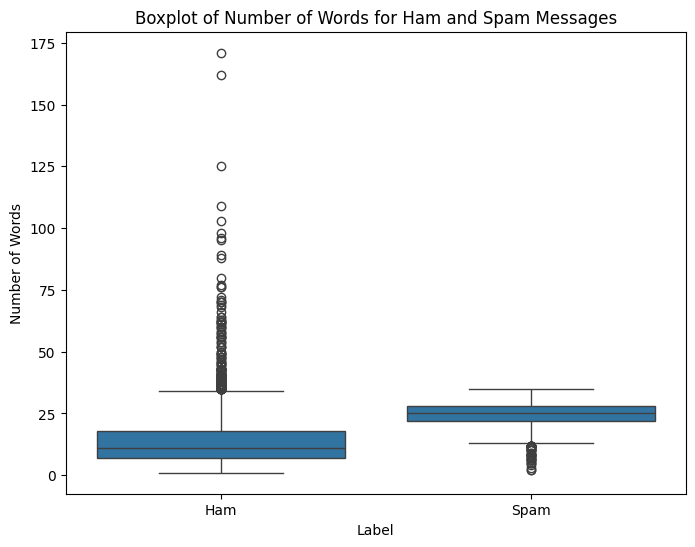

,message,num_words
1084,For me the love should start with attraction.i...,171
1862,The last thing i ever wanted to do was hurt yo...,162
2157,Sad story of a Man - Last week was my b'day. M...,125
2433,Indians r poor but India is not a poor country...,109
1578,How to Make a girl Happy? It's not at all diff...,103


In [95]:
# Check for outliers in num_words using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='num_words', data=df)
plt.title('Boxplot of Number of Words for Ham and Spam Messages')
plt.xlabel('Label')
plt.ylabel('Number of Words')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

# Show the top 5 messages with the most words
top_5_longest_messages = df[['message', 'num_words']].sort_values(by='num_words', ascending=False).head(5)
top_5_longest_messages

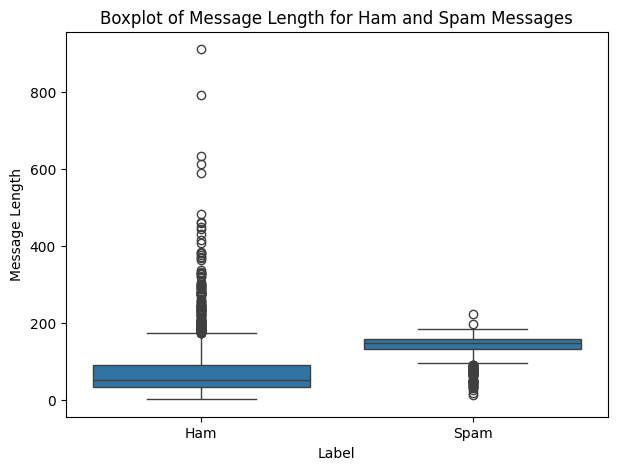

In [96]:
#Plotting message_length
# Check for outliers in message length using a boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(x='label', y='message_length', data=df)
plt.title('Boxplot of Message Length for Ham and Spam Messages')
plt.xlabel('Label')
plt.ylabel('Message Length')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

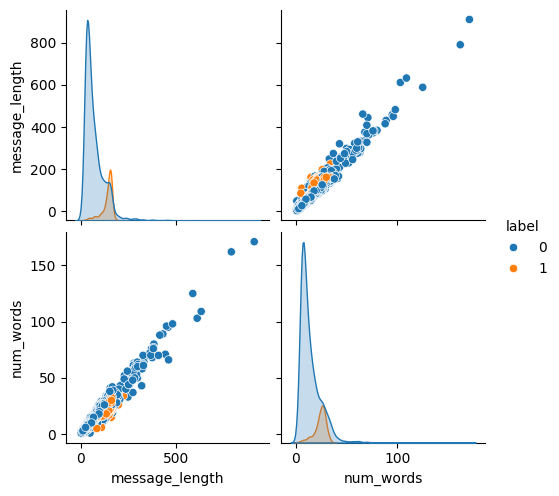

In [97]:
sns.pairplot(df,hue='label')


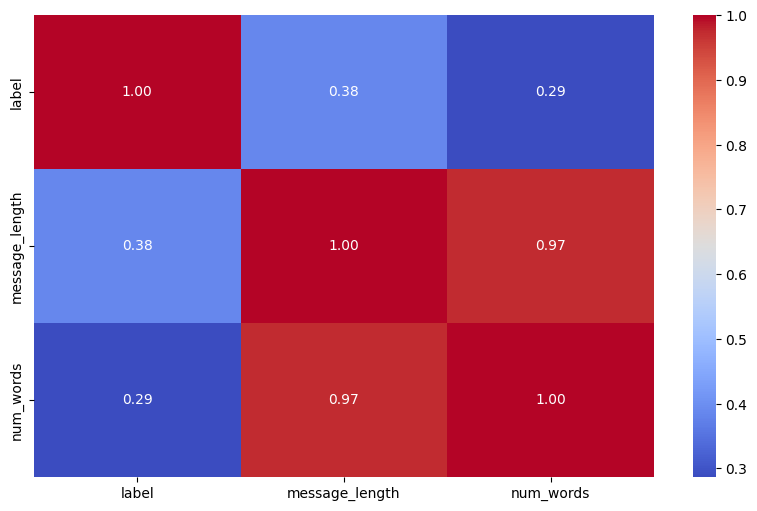

In [98]:


# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute and plot correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [99]:
# Display the number of rows and columns
shape = df.shape

In [100]:
# Display the column names
columns = df.columns

In [101]:
# Display the first 5 rows of the dataset
head = df.head()

In [102]:
shape, columns, head

((5169, 5),
 Index(['label', 'message', 'cleaned_message', 'message_length', 'num_words'], dtype='object'),
    label                                            message  \
 0      0  Go until jurong point, crazy.. Available only ...   
 1      0                      Ok lar... Joking wif u oni...   
 2      1  Free entry in 2 a wkly comp to win FA Cup fina...   
 3      0  U dun say so early hor... U c already then say...   
 4      0  Nah I don't think he goes to usf, he lives aro...   
 
                                      cleaned_message  message_length  \
 0  go jurong avail bugi n great world la e cine g...             111   
 1                                      ok joke wif u              29   
 2  free entri wkli comp win fa cup final tkt may ...             155   
 3                        u dun say earli u c alreadi              49   
 4                   nah think goe live around though              61   
 
    num_words  
 0         20  
 1          6  
 2         28  
 3

In [103]:
current_shape = df.shape

In [105]:
current_shape

(5169, 5)

**Model Training**  

In [108]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [106]:
df.sample(15)

,label,message,cleaned_message,message_length,num_words
3595,0,Good morning princess! Happy New Year!,good morn happi new,38,6
344,0,My sister cleared two round in birla soft yest...,sister clear two round birla soft,52,9
2672,0,Super msg da:)nalla timing.,super msg,27,4
4044,0,If You mean the website. Yes.,mean,29,6
865,1,Congratulations ur awarded either a yrs supply...,congratul ur award either yr suppli cd virgin ...,161,24
3274,0,Hurry home u big butt. Hang up on your last ca...,hurri home u big hang last caller u food done ask,120,26
5549,0,"You know, wot people wear. T shirts, jumpers, ...",wot peopl r cribb,87,18
3167,0,Ugh hopefully the asus ppl dont randomly do a ...,ugh hope asu ppl dont randomli,55,10
5411,0,I ask if u meeting da ge tmr nite...,ask u meet da ge tmr,36,9
4548,0,"Haha, my friend tyler literally just asked if ...",friend tyler liter ask could get dubsack,73,14


In [107]:
df.head()

,label,message,cleaned_message,message_length,num_words
0,0,"Go until jurong point, crazy.. Available only ...",go jurong avail bugi n great world la e cine g...,111,20
1,0,Ok lar... Joking wif u oni...,ok joke wif u,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt may ...,155,28
3,0,U dun say so early hor... U c already then say...,u dun say earli u c alreadi,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe live around though,61,13


In [110]:
# Split the data into features and target
X = df['cleaned_message']
y = df['label']


In [111]:
# Vectorize the data
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

In [112]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [113]:
# Initialize the models
svm_model = SVC()
rf_model = RandomForestClassifier(n_estimators=100)
xgb_model = xgb.XGBClassifier()

In [114]:
# Train the models
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [115]:
# Make predictions
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

In [116]:
# Evaluate the models
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

In [117]:
svm_report = classification_report(y_test, svm_pred)
rf_report = classification_report(y_test, rf_pred)
xgb_report = classification_report(y_test, xgb_pred)


In [118]:
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)

In [119]:
# Cross-validation scores
svm_cv_scores = cross_val_score(svm_model, X_vec, y, cv=5)
rf_cv_scores = cross_val_score(rf_model, X_vec, y, cv=5)
xgb_cv_scores = cross_val_score(xgb_model, X_vec, y, cv=5)


In [120]:
svm_accuracy, rf_accuracy, xgb_accuracy, svm_report, rf_report, xgb_report, svm_conf_matrix, rf_conf_matrix, xgb_conf_matrix, svm_cv_scores.mean(), rf_cv_scores.mean(), xgb_cv_scores.mean()

(0.9661508704061895,
 0.9690522243713733,
 0.9613152804642167,
 '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98       889\n           1       0.97      0.78      0.87       145\n\n    accuracy                           0.97      1034\n   macro avg       0.97      0.89      0.92      1034\nweighted avg       0.97      0.97      0.96      1034\n',
 '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98       889\n           1       0.99      0.79      0.88       145\n\n    accuracy                           0.97      1034\n   macro avg       0.98      0.89      0.93      1034\nweighted avg       0.97      0.97      0.97      1034\n',
 '              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98       889\n           1       0.91      0.81      0.85       145\n\n    accuracy                           0.96      1034\n   macro avg       0.94      0.90